# 02a: Solving ODEs

# Projectile Motion using 4th Order Runge-Kutta Method

Let's solve the equations of motion for a projectile using the 4th order Runge-Kutta method. Since the horizontal motion is uniform and can be directly integrated, we'll focus on the vertical motion.

## Equations for Vertical Motion

The equation for the vertical motion under gravity, neglecting air resistance, is given by:
$$ \frac{d^2y}{dt^2} = -g $$

To solve it using the Runge-Kutta method, we'll convert this second-order ODE into two first-order ODEs:

1. $ \frac{dy}{dt} = v $
2. $ \frac{dv}{dt} = -g $

## Implementing the 4th Order Runge-Kutta Method

Given the following initial conditions:
- Initial height: $ y_0 = 0 $ (assuming it's launched from the ground)
- Initial vertical velocity: $ v_0 = v_0 \sin(\theta) $
- Time step: $ \Delta t $

We can describe the 4th order Runge-Kutta method as:

* $ k_1 = \Delta t \cdot f(t, y) $

* $ k_2 = \Delta t \cdot f(t + 0.5\Delta t, y + 0.5k_1) $

* $ k_3 = \Delta t \cdot f(t + 0.5\Delta t, y + 0.5k_2) $

* $ k_4 = \Delta t \cdot f(t + \Delta t, y + k_3) $

Then, the new value of y is:
$$ y_{new} = y + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$

### Applying to our System

For the first equation, $ \frac{dy}{dt} = v $:

* $ k_{1y} = \Delta t \cdot v $

* $ k_{2y} = \Delta t \cdot (v + 0.5\Delta t \cdot (-g)) $

* $ k_{3y} = \Delta t \cdot (v + 0.5\Delta t \cdot (-g)) $
  (Same as $k_{2y}$ because acceleration due to gravity is constant)

* $ k_{4y} = \Delta t \cdot (v + \Delta t \cdot (-g)) $$

Subsequently, $ y_{new} = y + \frac{1}{6}(k_{1y} + 2k_{2y} + 2k_{3y} + k_{4y}) $

For the second equation, $ \frac{dv}{dt} = -g $:

* $ k_{1v} = \Delta t \cdot (-g) $

* $ k_{2v} = \Delta t \cdot (-g) $ (Constant due to gravity)

* $ k_{3v} = \Delta t \cdot (-g) $ (Constant due to gravity)

* $ k_{4v} = \Delta t \cdot (-g) $ (Constant due to gravity)

And then, $ v_{new} = v + \frac{1}{6}(k_{1v} + 2k_{2v} + 2k_{3v} + k_{4v}) $

By iterating over these steps for each time step, we can compute the projectile's vertical position and velocity over time.


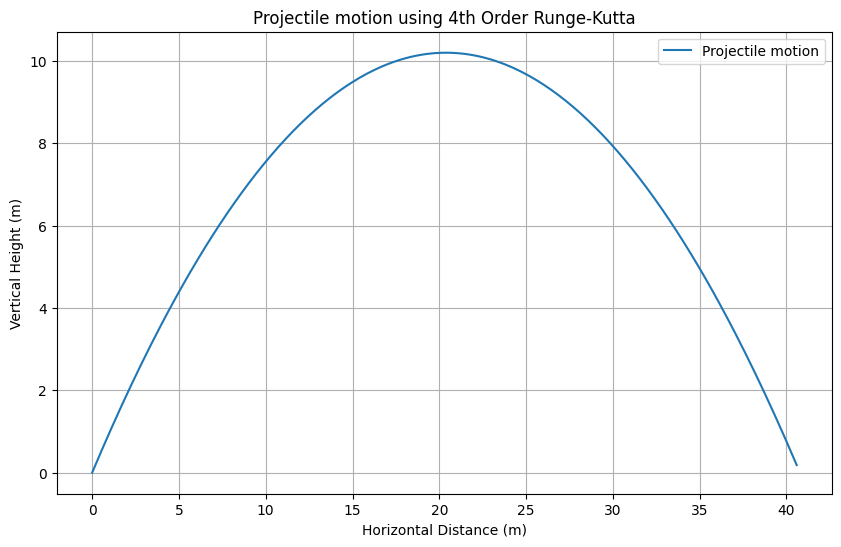

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_4th_order(y0, v0, dt, T, g=9.81):
    n = int(T/dt)
    y = np.zeros(n)
    v = np.zeros(n)
    t = np.zeros(n)

    y[0] = y0
    v[0] = v0

    for i in range(n-1):
        k1y = dt * v[i]
        k2y = dt * (v[i] + 0.5*dt*(-g))
        k3y = dt * (v[i] + 0.5*dt*(-g))
        k4y = dt * (v[i] + dt*(-g))

        y[i+1] = y[i] + (1/6)*(k1y + 2*k2y + 2*k3y + k4y)

        k1v = dt * (-g)
        k2v = dt * (-g)
        k3v = dt * (-g)
        k4v = dt * (-g)

        v[i+1] = v[i] + (1/6)*(k1v + 2*k2v + 2*k3v + k4v)

        t[i+1] = t[i] + dt

    return y, v, t

# Given parameters
theta = np.pi / 4  # 45 degrees
v0 = 20  # m/s initial speed
y0 = 0  # initial height
T = 2 * v0 * np.sin(theta) / 9.81  # total time for projectile to reach the ground
dt = 0.01  # time step

y, v, t = runge_kutta_4th_order(y0, v0*np.sin(theta), dt, T)

# Compute the horizontal motion (uniform)
x = v0 * np.cos(theta) * t

# Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Projectile motion')
plt.title('Projectile motion using 4th Order Runge-Kutta')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Height (m)')
plt.legend()
plt.grid(True)
plt.show()


# Explicit Euler

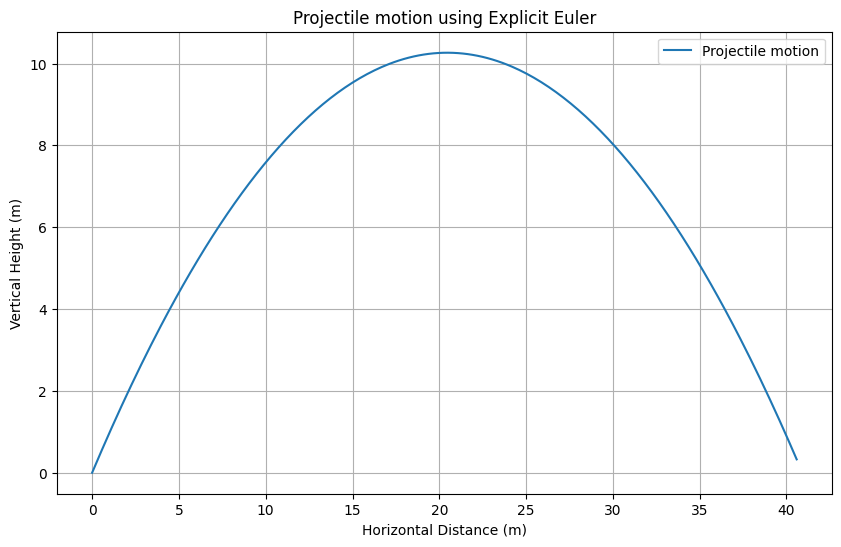

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(y0, v0, dt, T, g=9.81):
    n = int(T/dt)
    y = np.zeros(n)
    v = np.zeros(n)
    t = np.zeros(n)

    y[0] = y0
    v[0] = v0

    for i in range(n-1):
        y[i+1] = y[i] + dt * v[i]
        v[i+1] = v[i] - dt * g  # subtracting because g is acting downwards

        t[i+1] = t[i] + dt

    return y, v, t

# Given parameters
theta = np.pi / 4  # 45 degrees
v0 = 20  # m/s initial speed
y0 = 0  # initial height
T = 2 * v0 * np.sin(theta) / 9.81  # total time for projectile to reach the ground
dt = 0.01  # time step

y, v, t = explicit_euler(y0, v0*np.sin(theta), dt, T)

# Compute the horizontal motion (uniform)
x = v0 * np.cos(theta) * t

# Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Projectile motion')
plt.title('Projectile motion using Explicit Euler')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Height (m)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.fc(x)

# Create a PINN loss function
def pinn_loss(model, t, y_initial, v_initial, g=9.81):
    y_pred = model(t)

    # Calculate dy/dt using auto differentiation
    dy_dt = torch.autograd.grad(y_pred.sum(), t, create_graph=True)[0]

    # Calculate d^2y/dt^2 using auto differentiation
    d2y_dt2 = torch.autograd.grad(dy_dt.sum(), t, create_graph=True)[0]

    # Loss based on the physics (gravity)
    loss_physics = torch.mean((d2y_dt2 + g)**2)

    # Loss based on the initial conditions
    loss_initial = (y_pred[0] - y_initial)**2 + (dy_dt[0] - v_initial)**2

    return loss_physics + loss_initial

# Train the model
def train(model, t, y_initial, v_initial, epochs=5000, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in tqdm(range(epochs)):
        optimizer.zero_grad()
        loss = pinn_loss(model, t, y_initial, v_initial)
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Training data (only time, since we'll use PINNs)
theta = np.pi / 4
v0 = 20.0
T = 2 * v0 * np.sin(theta) / 9.81
t_train = torch.linspace(0, T, 100).reshape(-1, 1).float().requires_grad_(True)
y_initial = torch.tensor([0.0])
v_initial = torch.tensor([v0 * np.sin(theta)])

# Initialize and train the model
model = Net()
train(model, t_train, y_initial, v_initial)

# Predict using the trained model
t_test = torch.linspace(0, T, 200).reshape(-1, 1).float()
y_pred = model(t_test).detach().numpy()

  0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 0, Loss: 302.5135541461069
Epoch 1000, Loss: 22.61660873392652
Epoch 2000, Loss: 1.5989485408899868
Epoch 3000, Loss: 0.09331983717738641
Epoch 4000, Loss: 0.018365084036006295


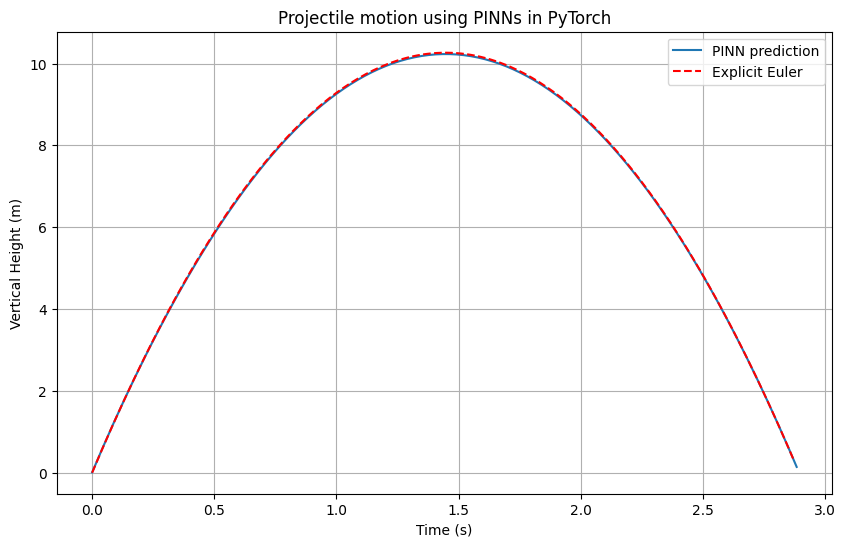

In [16]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(t_test, y_pred, label='PINN prediction')
plt.plot(t, y, 'r--', label='Explicit Euler')
plt.title('Projectile motion using PINNs in PyTorch')
plt.xlabel('Time (s)')
plt.ylabel('Vertical Height (m)')
plt.legend()
plt.grid(True)
plt.show()
